In [1]:
import os
import sys
proj_root = os.path.abspath(os.path.join(os.path.abspath(""), ".."))
sys.path.append(str(proj_root))

from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_10 import Prod10

PRZED P10 – S ma R=1, krawędzie E mają R=0


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1763cf470>,
  <matplotlib.collections.PatchCollection at 0x17647bdd0>))

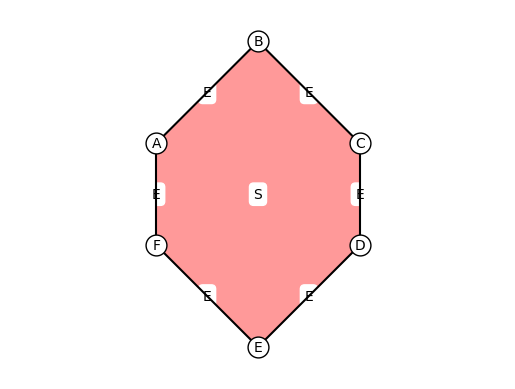

In [6]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType

hg_p10_test = Hypergraph()
nodes = ["A", "B", "C", "D", "E", "F"]

coords = {
    "A": {"x": 0, "y": 1}, "B": {"x": 1, "y": 2}, "C": {"x": 2, "y": 1},
    "D": {"x": 2, "y": 0}, "E": {"x": 1, "y": -1}, "F": {"x": 0, "y": 0}
}
for node, params in coords.items():
    hg_p10_test.set_vertex_parameter(node, params)

for i in range(6):
    u, v = nodes[i], nodes[(i + 1) % 6]
    hg_p10_test.add_edge(Edge(EdgeType.E, frozenset([u, v]), {"R": 0}))

hg_p10_test.add_edge(Edge(EdgeType.S, frozenset(nodes), {"R": 1}))

print("PRZED P10 – S ma R=1, krawędzie E mają R=0")
hg_p10_test.draw(use_positional_parameters=True)


frozenset({Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'E'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'F', 'A'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={'R': 1}), Edge(type=EdgeType.S, vertices=frozenset({'D', 'F', 'A', 'C', 'B', 'E'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={'R': 1})})


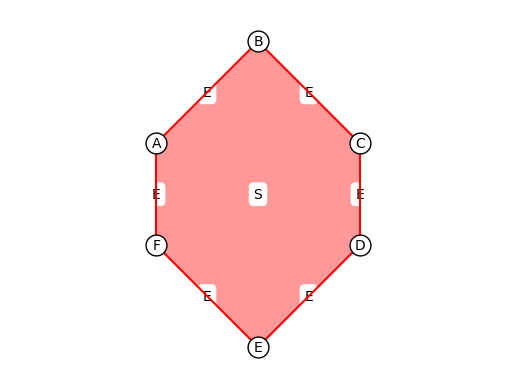

In [7]:
prod10 = Prod10()
hg_result = prod10.apply(hg_p10_test)

if hg_result:
    print(hg_result.get_edges())
    hg_result.draw(use_positional_parameters=True)
else:
    print("Produkcja P10 zwróciła None (brak zmian)")

# Trudniejszy przykład

PRZED P10: Tylko lewy element S ma R=1. Wszystkie E mają R=0.


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x17650df10>,
  <matplotlib.collections.PatchCollection at 0x1763cf9e0>))

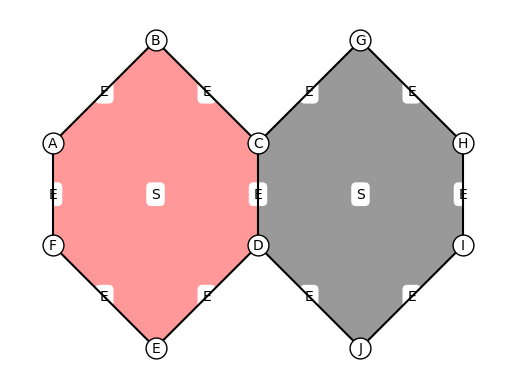

In [8]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType

hg = Hypergraph()

left_nodes = ["A", "B", "C", "D", "E", "F"]
right_nodes = ["C", "G", "H", "I", "J", "D"]

for i in range(6):
    u, v = left_nodes[i], left_nodes[(i + 1) % 6]
    hg.add_edge(Edge(EdgeType.E, frozenset([u, v]), {"R": 0}))

hg.add_edge(Edge(EdgeType.S, frozenset(left_nodes), {"R": 1}))

for i in range(6):
    u, v = right_nodes[i], right_nodes[(i + 1) % 6]
    if frozenset([u, v]) != frozenset(["C", "D"]):
        hg.add_edge(Edge(EdgeType.E, frozenset([u, v]), {"R": 0}))

hg.add_edge(Edge(EdgeType.S, frozenset(right_nodes), {"R": 0}))

coords = {
    "A": (0, 1), "B": (1, 2), "C": (2, 1),
    "D": (2, 0), "E": (1, -1), "F": (0, 0),
    "G": (3, 2), "H": (4, 1), "I": (4, 0), "J": (3, -1),
}
for v, (x, y) in coords.items():
    hg.set_vertex_parameter(v, {"x": x, "y": y})

print("PRZED P10: Tylko lewy element S ma R=1. Wszystkie E mają R=0.")
hg.draw(use_positional_parameters=True)

PO P10: Krawędzie lewego elementu powinny mieć R=1.
frozenset({Edge(type=EdgeType.E, vertices=frozenset({'G', 'C'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'J', 'I'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'E'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'J'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'G', 'H'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'F', 'A'}), parameters={'R': 1}), Edge(type=EdgeType.S, vertices=frozenset({'G', 'D', 'H', 'C', 'I', 'J'}), parameters={'R': 0}), Edge(type=EdgeType.S, vertices=frozenset({'D', 'F', 'A', 'C', 'B', 'E'}), paramet

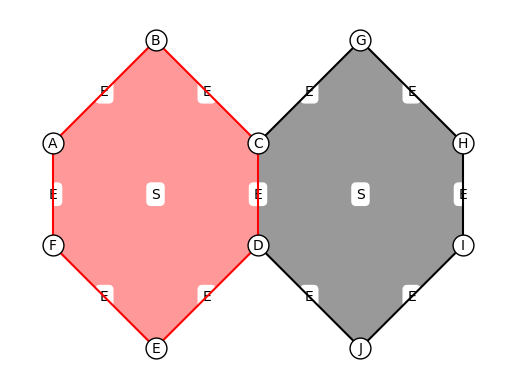

In [9]:
prod10 = Prod10()
hg_result = prod10.apply(hg)

if hg_result:
    print("PO P10: Krawędzie lewego elementu powinny mieć R=1.")
    print(hg_result.get_edges())
    hg_result.draw(use_positional_parameters=True)
else:
    print("Produkcja P10 nie znalazła nic do zmiany.")